# PCA bi-plot in Python - Rotation matrix from PCA plotted

How to create a PCA biplot and make inferences of the biplot in Python?

I learnt about PCA bi-plots from a coursework UT Austin's course called "Data Visualization in R". Being a python user I wanted to replicate the same plot in Python for my own research. Below is a demo of how to create a bi-plot with the blue-jays bird dataset along with the interpretation of bi-plots.



### Import Standard Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Import Blue - jays bird dataset
blue_j=pd.read_csv("https://raw.githubusercontent.com/nishamathi/SampleDatasets/main/blue_jays.csv")
blue_j.head()

,bird_id,sex,bill_depth_mm,bill_width_mm,bill_length_mm,head_length_mm,body_mass_g,skull_size_mm
0,0000-00000,M,8.26,9.21,25.92,56.58,73.30,30.66
1,1142-05901,M,8.54,8.76,24.99,56.36,75.10,31.38
2,1142-05905,M,8.39,8.78,26.07,57.32,70.25,31.25
3,1142-05907,F,7.78,9.30,23.48,53.77,65.50,30.29
4,1142-05909,M,8.71,9.84,25.47,57.32,74.90,31.85


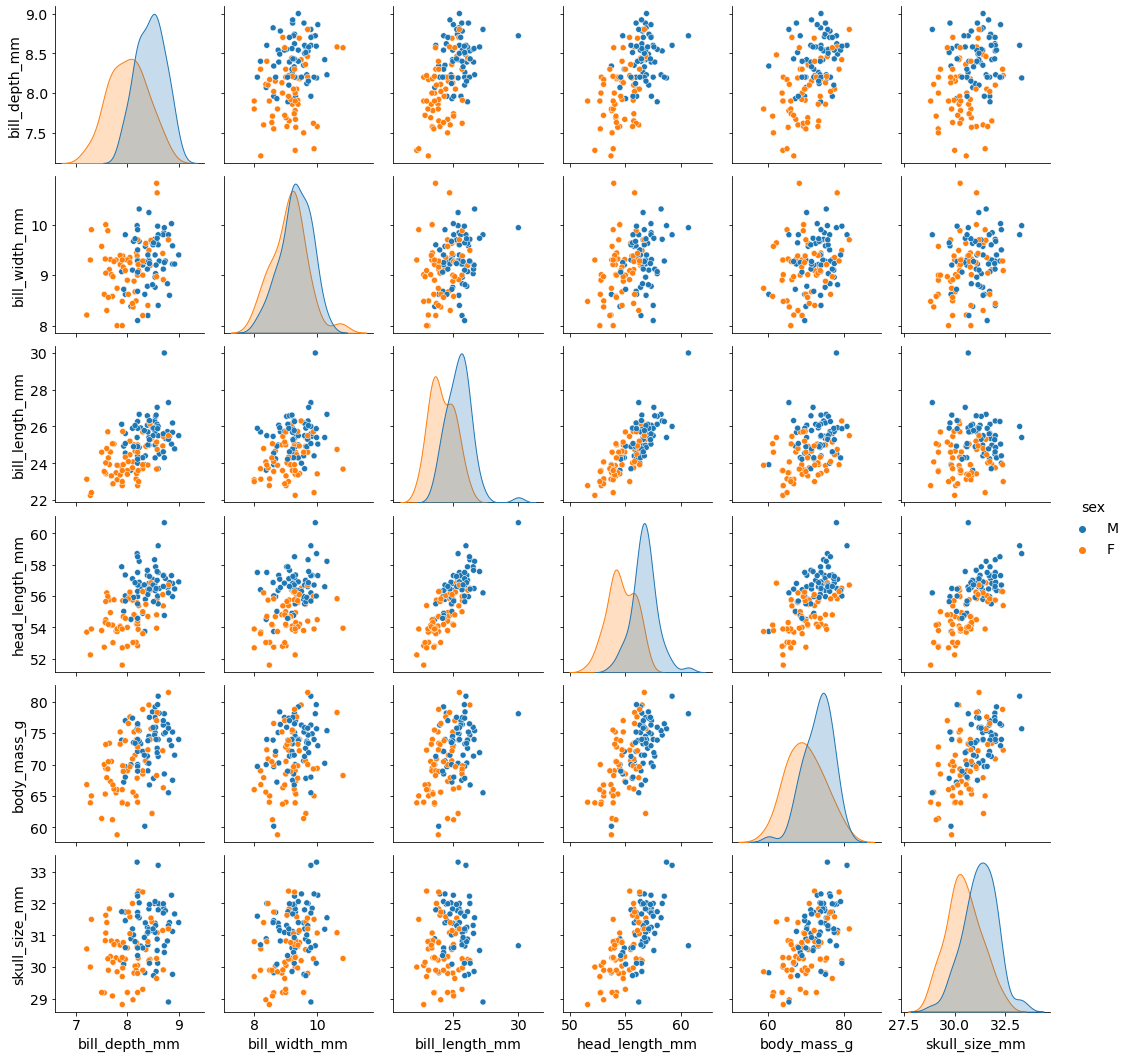

In [8]:
from matplotlib import rcParams
# figure size in inches and setting figure parameters such as font size for all plots
rcParams['figure.figsize'] = 13,10
plt.rcParams.update({'font.size': 14})

sns.pairplot(blue_j, hue="sex")

1.   All-by-all scatter plots provides the distinction between the 2 sexes reasonably well and allows us to make inferences that there is some separation between the 2 sexes in different variable pairs. For example focussing on the pair plot of head length and skull size, we can see that higher values for both head length and skull size will be a male blue-jay while lower values are female blue-jays.

2.   To make an inference of the combined effects of all the 6 variables on sex of blue-jay, we can apply a dimension reduction technique. 

3. PCA is a dimension reduction technique that collapses the information from the high dimensional (6 variable space) to a reduced dimensional space.

In [9]:
# PCA requires scaling to be performed before we apply a rotation matrix to the input matrix.
X = blue_j[['bill_depth_mm','bill_width_mm','bill_length_mm','head_length_mm','body_mass_g','skull_size_mm']]
y = blue_j['sex']

# Saving column names for the bi-plot
X_col = pd.DataFrame(X, columns=['bill_depth_mm','bill_width_mm','bill_length_mm','head_length_mm','body_mass_g','skull_size_mm'])

# Perform scaling
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X) 

# Implement PCA
pca = PCA(n_components=6)
x_new = pca.fit_transform(X)
print('=======================================================')
print('Shape of reduced input matrix after PCA: ', x_new.shape)
print('=======================================================')
print('Explained variance vector in PCA', pca.explained_variance_ )
print('=======================================================')
print('Explained variance ratio vector in PCA', pca.explained_variance_ratio_)

Shape of reduced input matrix after PCA:  (123, 6)
Explained variance vector in PCA [3.27285944e+00 1.01155659e+00 8.13786358e-01 5.46814658e-01
 4.04161477e-01 1.80432307e-06]
Explained variance ratio vector in PCA [5.41041805e-01 1.67222092e-01 1.34528368e-01 9.03948351e-02
 6.68126020e-02 2.98275630e-07]


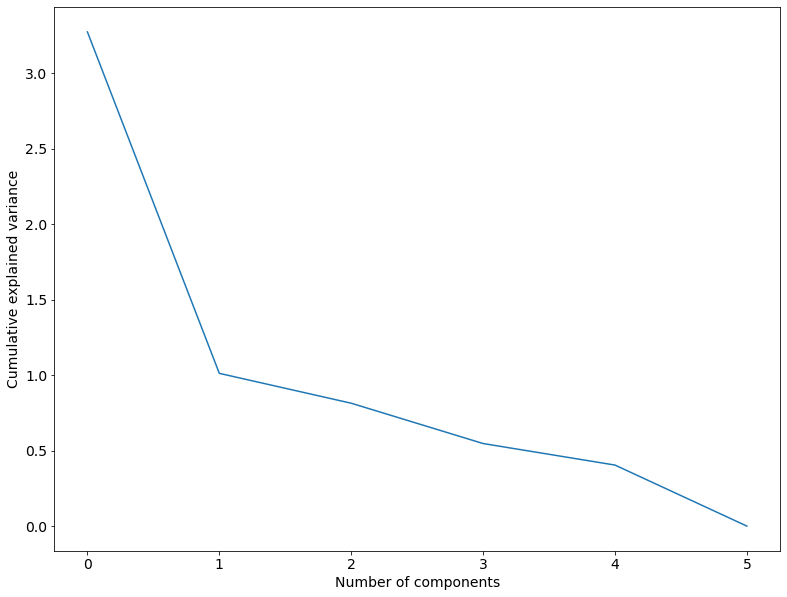

In [10]:
# Scree plot i.e., Plot of eigen values (explained variance) of each prinicpal component
plt.plot(pca.explained_variance_)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


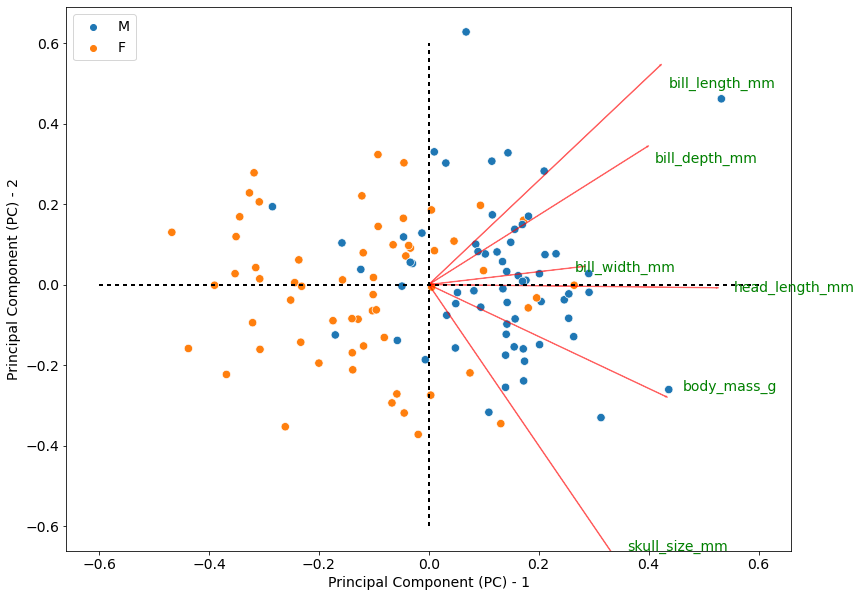

In [11]:
# Rotation matrix allows to interpret PCs. Create a function to 
# create a bi-plot of first and 2nd principal components
def mybiplot(score,coeff,labels=None):
    # Taking PC1 values as a vector input
    xs = score[:,0]
    # Taking PC2 values as a vector input
    ys = score[:,1]
    n = coeff.shape[0]

    # Perform scaling for plots
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    # Plot PC1, PC2 as scatter plot with sex as a 3rd dimension
    sns.scatterplot(xs * scalex,ys * scaley, s=70, hue=y.to_numpy()) #NOTE: y is declared outside of the function

    plt.plot([0, 0], [-0.6, 0.6], 'k-', lw=2,dashes=[2, 2])
    plt.plot([-0.6, 0.6], [0, 0], 'k-', lw=2,dashes=[2, 2])
    plt.legend(loc='upper left', markerscale=1.0)

    # Plot the rotation matrix and weightage of each original feature contribution to the PCs
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1),fontsize=18, color = 'green', horizontalalignment = 'center', verticalalignment = 'center')
        else:
            #print(coeff[i,0], coeff[i,1])
            plt.text(coeff[i,0]* 1.27, coeff[i,1] * 0.915, labels[i], color = 'g', horizontalalignment = 'center', verticalalignment = 'center')
 
    plt.xlabel("Principal Component (PC) - {}".format(1))
    plt.ylabel("Principal Component (PC) - {}".format(2))
    
    #plt.grid()

# Call the function
mybiplot(x_new[:,0:2],np.transpose(pca.components_[0:2,:]),list(X_col))
plt.show()

**PCA Biplot:** Contains two plots to help us infer details on the PCA analysis

1. PCA scatter plot which shows first two components in this example.
2. PCA loading plot which shows how strongly each feature/variable influences a principal component. All vectors start at origin and their projected values on components explains how much weight they have on that component. Also, angles between individual vectors tells about correlation between them.

Overall, the biplot contains a lot of information and can be helpful in interpreting relationships between 2 sex groups in this dataset. In the biplot shown below, we can see that PC1 nicely separates male and female, while PC2 doesn't so much separate the 2 sex groups. In other words if PC1 is >0 i.e., positive then it is a male while a negatice value for PC1 is mostly a female, but interpreting PC2 together with PC1 will give more meaning to the group identification here. Both male and female birds have long and short bills relative to their overall size (PC1).

**Inferences from the bi-plot**

1.   All the vectors are directed to the right hand side in this case. 

2.   Head length aligns almost exactly with PC-1 direction. 

3.   Any feature/variable of the blue jay, when increased (example bill length or bill depth etc.,) then we move towards right in the direction of PC1. We can therefore infer that PC1 represents the overall size of the bird.
4. In other words, male birds are bigger than female birds.
5. On average a clear separation occurs in the PC1 direction between the two sex of the blue jay birds. 
6. PC2 is orthogonal to PC1 based on the theory of how the principal components are constructed. 
7. PC2 thus explains the relative proportion. For example, length of the bird to the skull size. In other words if we change the bill length PC2 gets bigger because the vector is pointed to top right but when we change the skull size PC2 gets smaller as the vector goes to bottom right. Either way PC1 still would get bigger. This is because increasing the skull size or bill length will also lead to an increase in value for the PC1 component.